# Spam Text Classification

### Bag of Words (BoW) 

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. 

`x = ['which book is this', 'this is book and this is math']`

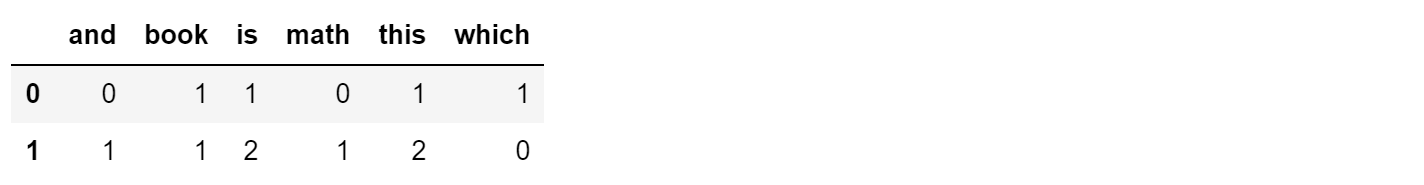

### Term Frequency (TF)

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.



`x = ['which book is this', 'this is book and this is math']`

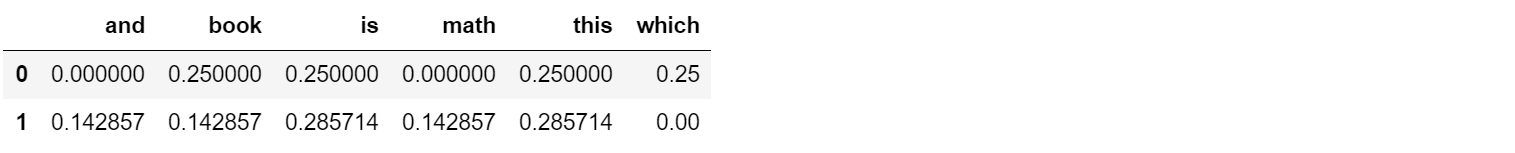

### Inverse Document Frequency IDF 

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

`log -> log base e`

where, N is the total number of rows and n is the number of rows in which the word was present.

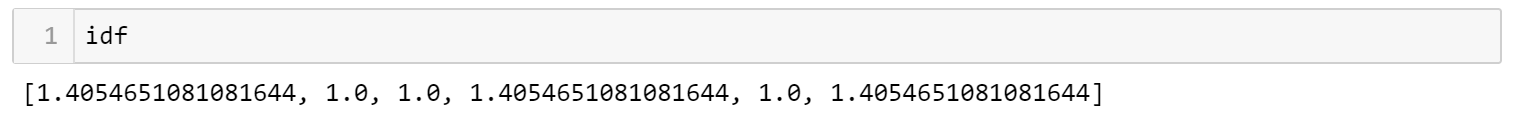

### TFIDF 

- Term Frequency: This summarizes how often a given word appears within a document.
- Inverse Document Frequency: This downscales words that appear a lot across documents.

`TF * IDF`

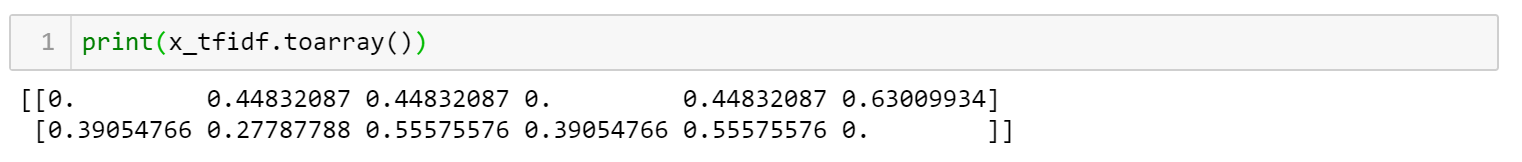

## Code Along 

Data Visualization Course
https://bit.ly/udemy95off_kgptalkie 

What you will learn in this course

✔✔ Learn complete Exploratory Data Analysis on latest Covid-19 Dataset

✔✔ Learn EDA on Kaggle's Boston Housing and Titanic Datasets

✔✔ Complete EDA on IPL Cricket Matches, FIFA World Cup Matches, and Text Data

✔✔ And so much more

## Data Loading

In [1]:
# loading the data -> data visualization -> train test split
# -> model building -> training -> evaluation -> streamlit application

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.shape

(5572, 4)

In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Dataset Balancing

In [7]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [8]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [9]:
ham = ham.sample(spam.shape[0])

In [10]:
ham.shape


(747, 4)

In [11]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [12]:
data.shape

(1494, 4)

In [13]:
data.sample(5)

,label,message,length,punct
577,ham,They finally came to fix the ceiling.,37,1
760,spam,Urgent UR awarded a complimentary trip to Euro...,159,10
838,spam,Todays Vodafone numbers ending with 4882 are s...,148,2
36,ham,Prabha..i'm soryda..realy..frm heart i'm sory,45,8
1252,spam,We tried to contact you re your reply to our o...,158,4


## Exploratory Data Analysis

In [14]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [15]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

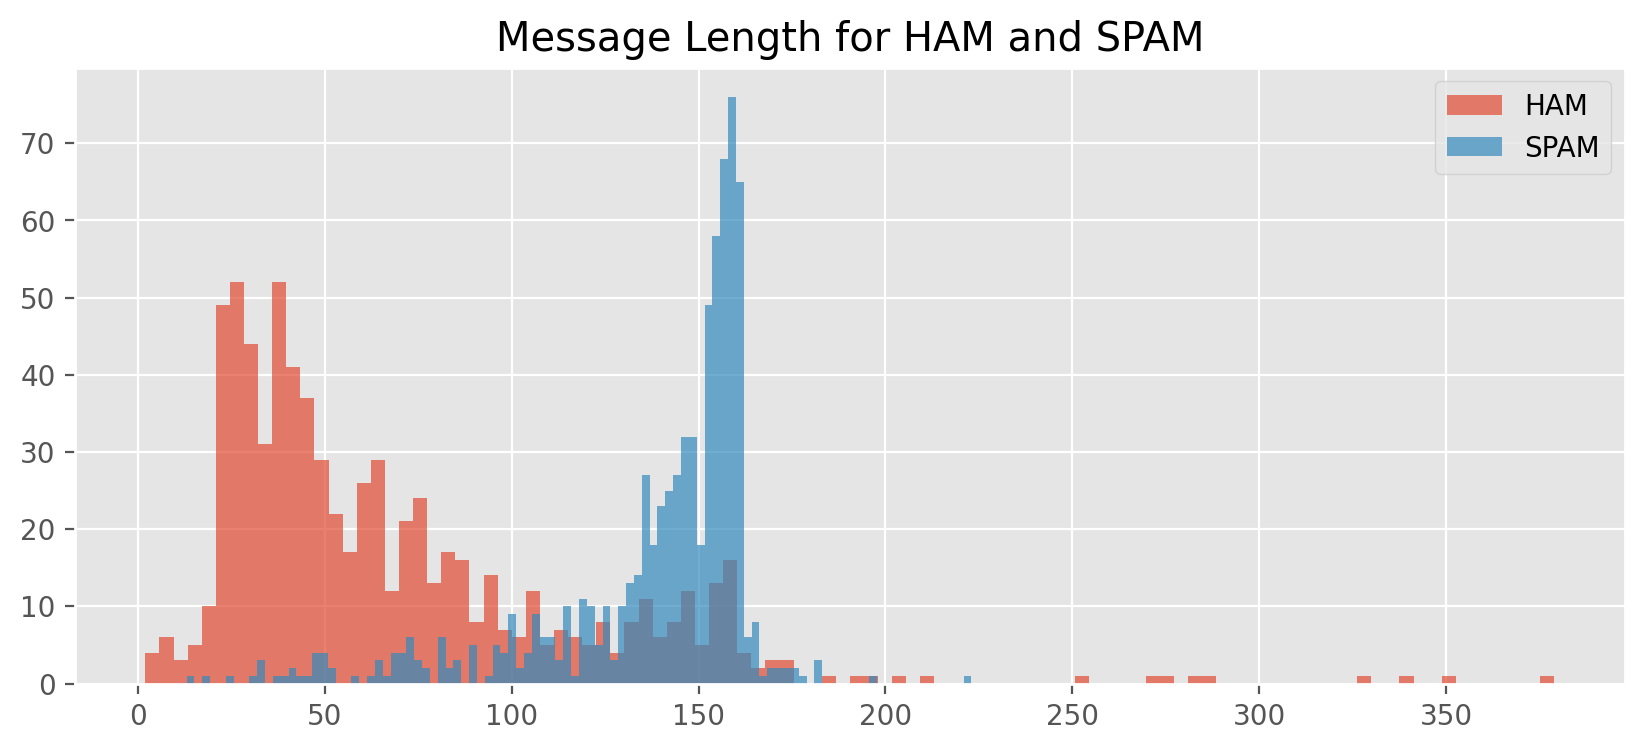

In [16]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

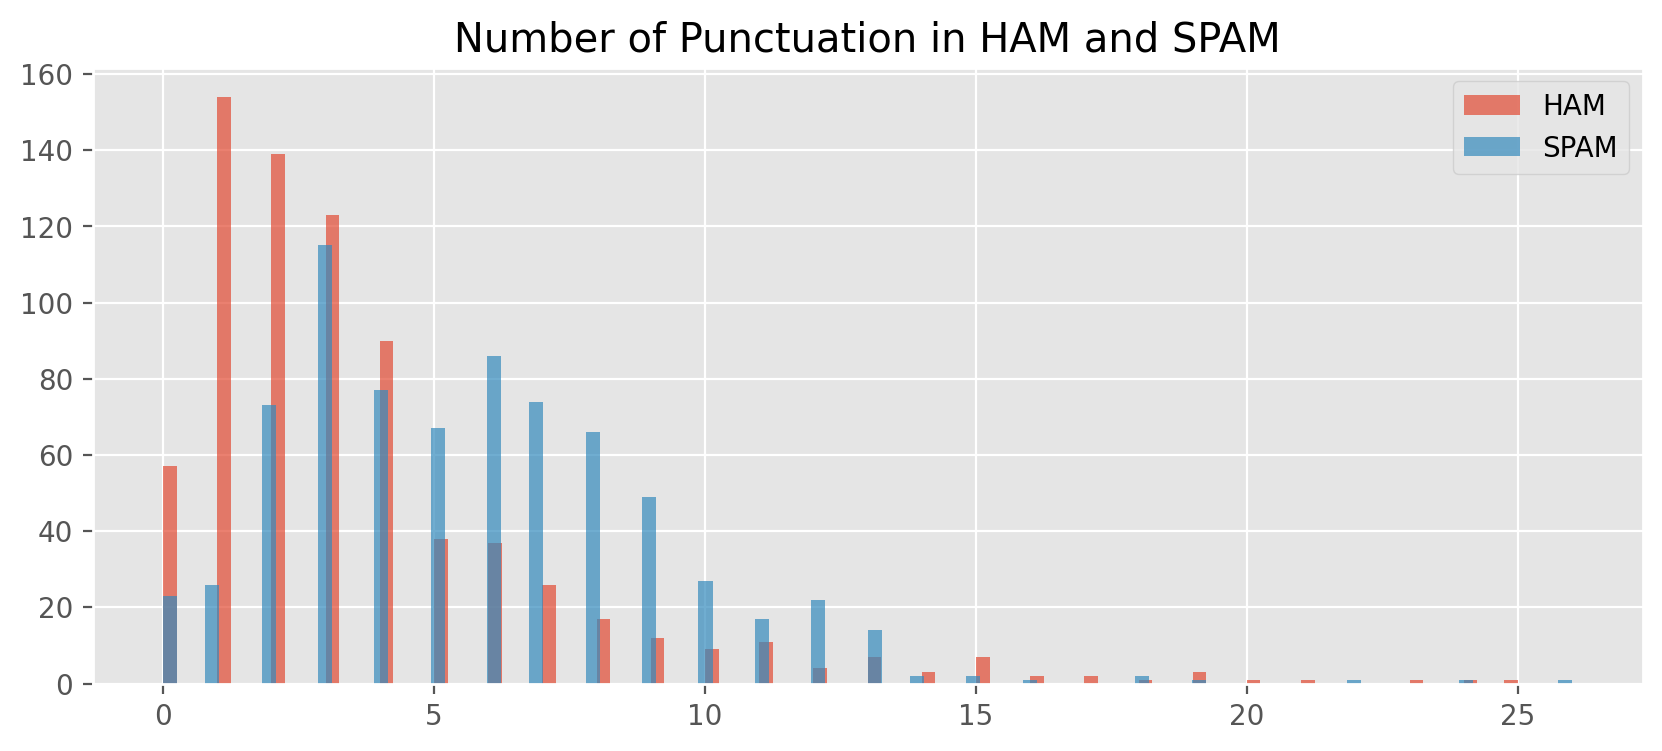

In [17]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

## Data Preparation for Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.2, random_state=0,
                                                   shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [20]:
# model Building
clf = Pipeline([('tfidf', TfidfVectorizer()), 
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.93       150
        spam       0.98      0.87      0.92       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



In [23]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])



array(['spam', 'ham'], dtype=object)

In [24]:
clf.classes_

array(['ham', 'spam'], dtype=object)

## Save and Load Model

In [25]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))


In [26]:
model = pickle.load(open('model.pkl', 'rb'))

In [27]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])


array(['spam', 'ham'], dtype=object)